## Required Libraries

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
# Setting current working directory (Optional)
from os import chdir
chdir("Path_To_Data_File")

## Visualization Settings (Optional)

In [3]:
# plt.rcdefaults()

In [4]:
plt.style.use("seaborn")
plt.rc("figure", figsize=[9, 5])

## Importing Data

In [5]:
train_data = loadmat(file_name="anomaly_train.mat")

## Helper Functions

In [6]:
def find_best_epsilon(yval, pval):
    """
    Helper Function to find and return the best F1 score
    and Epsilon value for the given feature.
    """
    F1 = 0
    bestF1 = 0
    bestEpsilon = 0

    stepsize = (np.max(pval) - np.min(pval))/1000

    epsVec = np.arange(np.min(pval), np.max(pval), stepsize)
    noe = len(epsVec)

    for eps in range(noe):
        epsilon = epsVec[eps]
        pred = (pval < epsilon)
        prec, rec = 0,0
        tp,fp,fn = 0,0,0

        try:
            for i in range(np.size(pval,0)):
                if pred[i] == 1 and yval[i] == 1:
                    tp+=1
                elif pred[i] == 1 and yval[i] == 0:
                    fp+=1
                elif pred[i] == 0 and yval[i] == 1:
                    fn+=1
            prec = tp/(tp + fp)
            rec = tp/(tp + fn)
            F1 = 2*prec*rec/(prec + rec)
            if F1 > bestF1:
                bestF1 = F1
                bestEpsilon = epsilon

        except ZeroDivisionError:
            print("Finished Finding Epsilon...")

    return bestF1, bestEpsilon

## Data Distribution

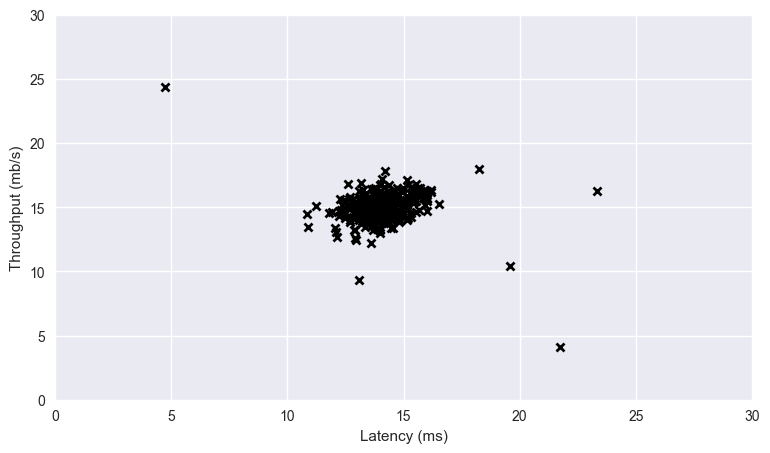

In [7]:
plt.plot(train_data["X"][:, 0], train_data["X"][:, 1], 'bx', mew=2, mec='k', ms=6)
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

## Parameters Estimation

In [8]:
mu = np.mean(train_data["X"], axis=0)
sigma2 = np.std(train_data["X"], axis=0)

## Creating Multivariate Distribution

In [9]:
dist_variable = multivariate_normal(mean=mu)

## Density Estimation

In [10]:
pval_train = dist_variable.pdf(train_data["X"])

In [11]:
pval_train_val = dist_variable.pdf(train_data["Xval"])

## Best Epsilon

In [12]:
best_f1, best_epsilon = find_best_epsilon(train_data["yval"], pval_train_val)
print("Best F1 Score : ", round(best_f1, 2) * 100 , "\nBest Epsilon : ", best_epsilon)

Finished Finding Epsilon...
Best F1 Score :  82.0 
Best Epsilon :  0.0001591449216860312


## Detecting Anomalies

In [13]:
anomaly_idx = [i for i in range(len(pval_train)) if pval_train[i] < best_epsilon]

In [14]:
anomaly_idx

[300, 301, 303, 304, 305, 306]

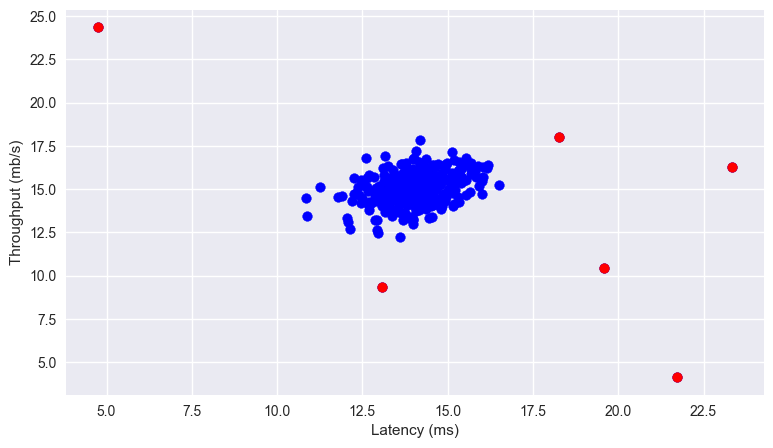

In [15]:
plt.scatter(train_data["X"][:, 0], train_data["X"][:, 1], c='b')
plt.scatter(train_data["X"][anomaly_idx, 0], train_data["X"][anomaly_idx, 1], c='r')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

## Note:
1. In this Notebook, we have detected the anomalies using the concept of Normal Distribution and probability densities.
2. However it is possible to detect anomalies using Supervised Learning Techniques if we have dataset with both anomalies and anomalies data points.
3. If the dataset is imbalanced then we can use the techniques like Under-Sampling or Over-Sampling and Synthetic Minority Oversampling TEchnique(SMOTE) to balance the dataset and go with the Supervised Learning approach.